In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [8]:
#Checking the null values(if any)
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
#Dropping the _c39 column
df.drop(['_c39'],axis=1,inplace=True)

In [10]:
#Finding unique observations from the data frame using nunique()
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
        'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
        'incident_hour_of_the_day', 'number_of_vehicles_involved',
        'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
        'property_claim', 'vehicle_claim', 'auto_year'],
       dtype='object'),
 dtype('float64'): Index(['policy_annual_premium'], dtype='object'),
 dtype('O'): Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_date', 'incident_type',
        'collision_type', 'incident_severity', 'authorities_contacted',
        'incident_state', 'incident_city', 'incident_location',
        'property_damage', 'police_report_available', 'auto_make', 'auto_model',
        'fraud_reported'],
       dtype='object')}

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
#checking the correlation
dfcor=df.corr()

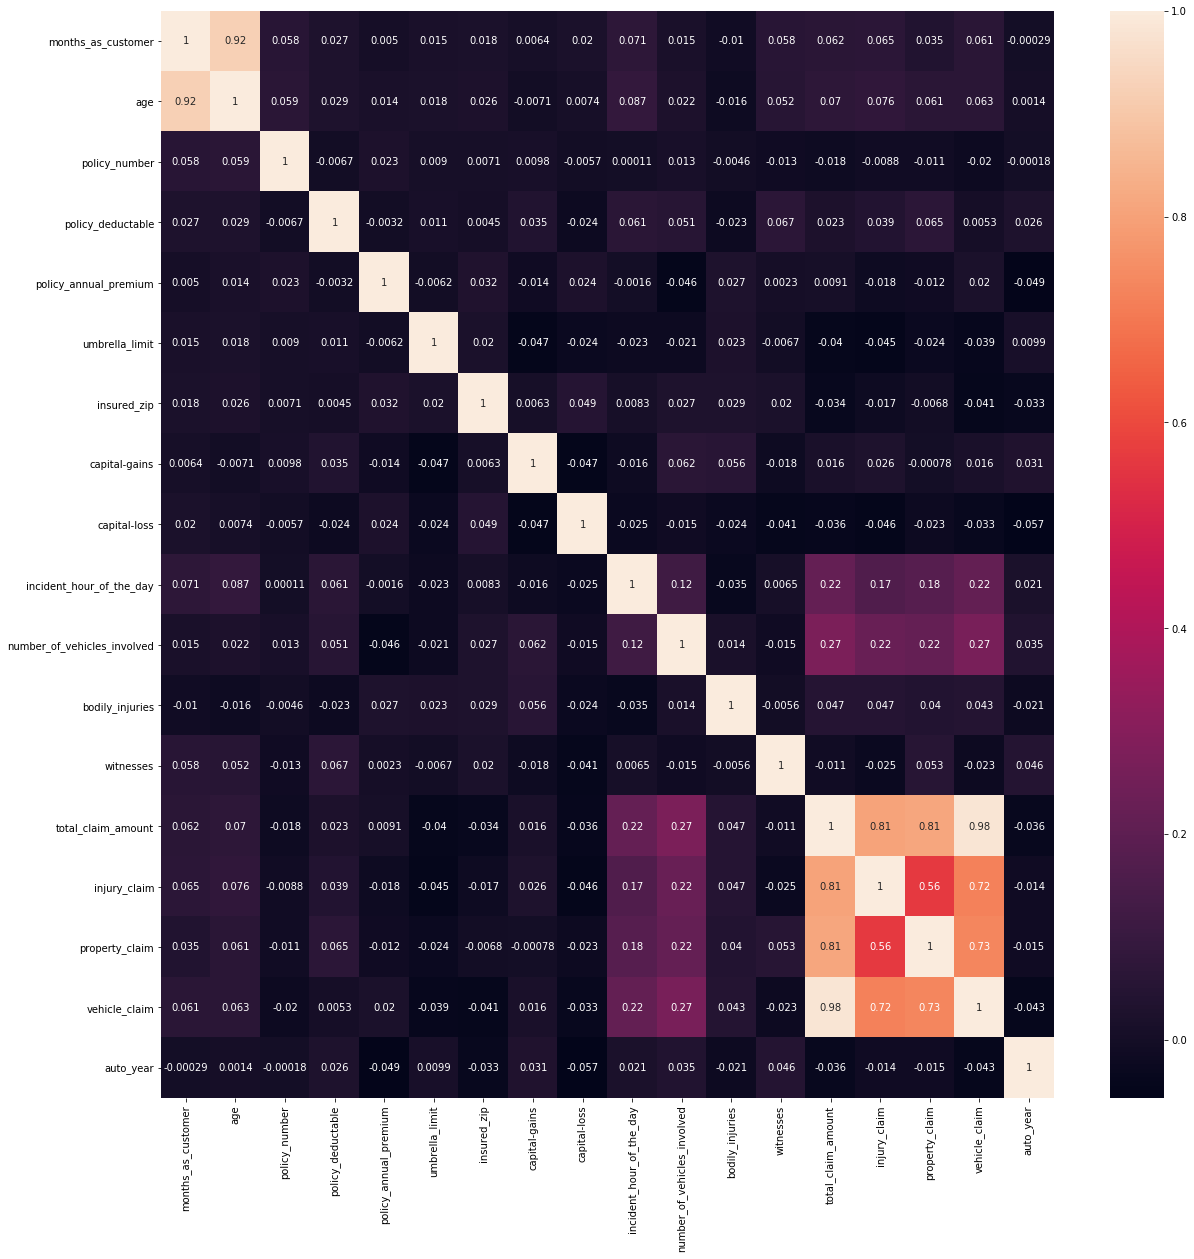

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True)
plt.show()

In [15]:
#We can group both int and float
df_int=df.select_dtypes(include=[np.number])

In [16]:
df_int.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [17]:
#Checking the skewness

df_int.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

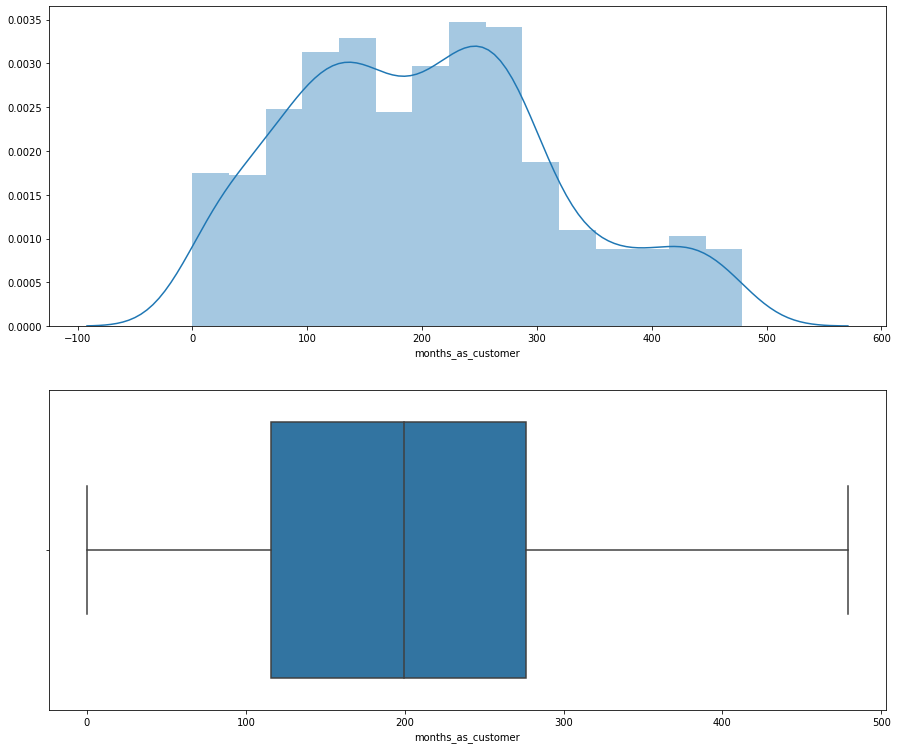

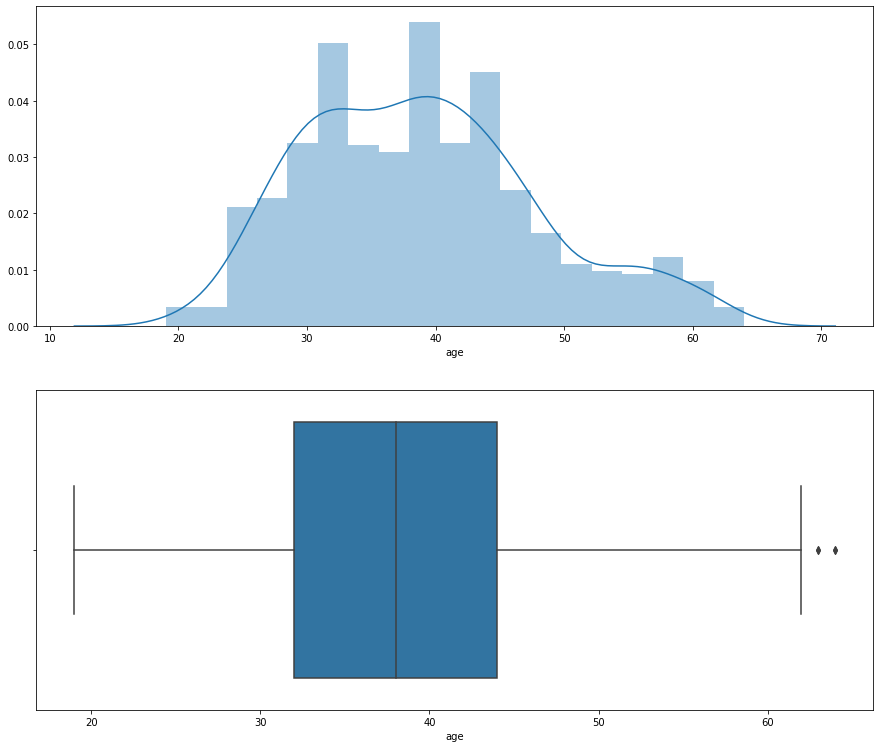

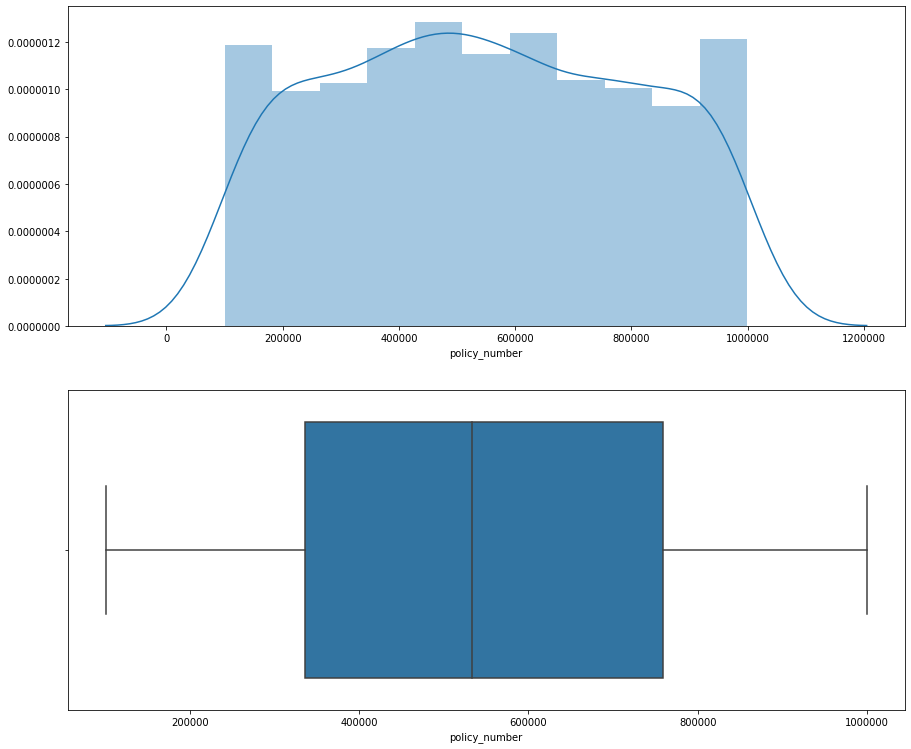

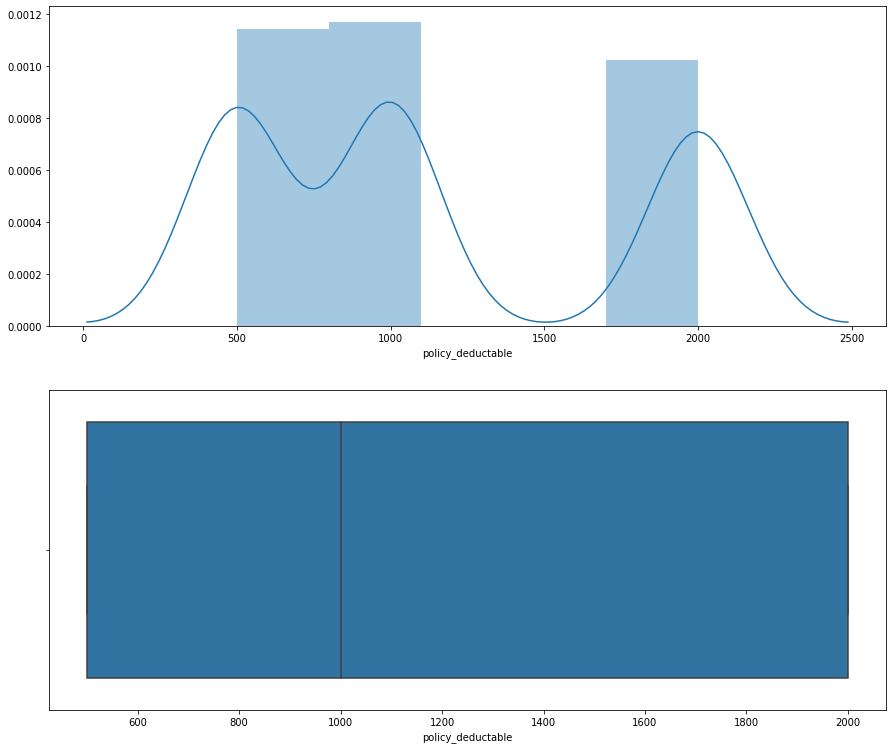

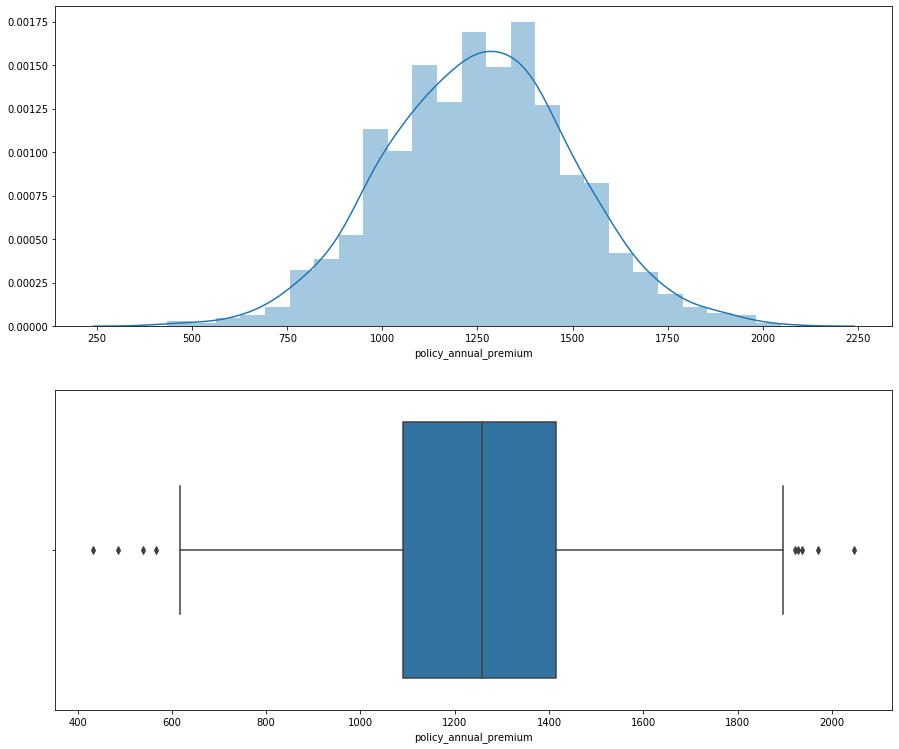

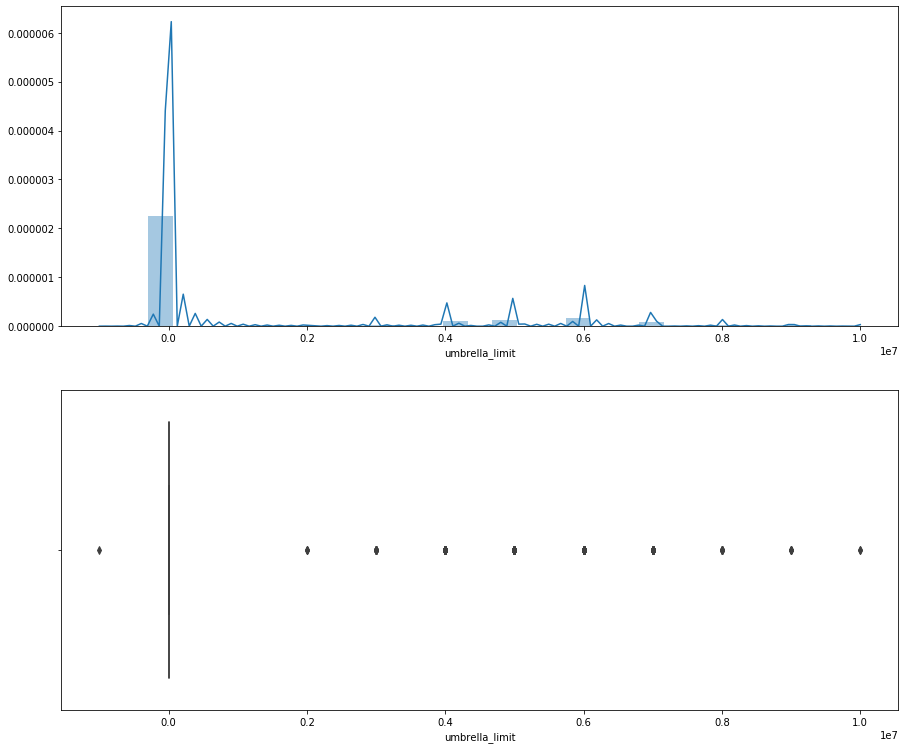

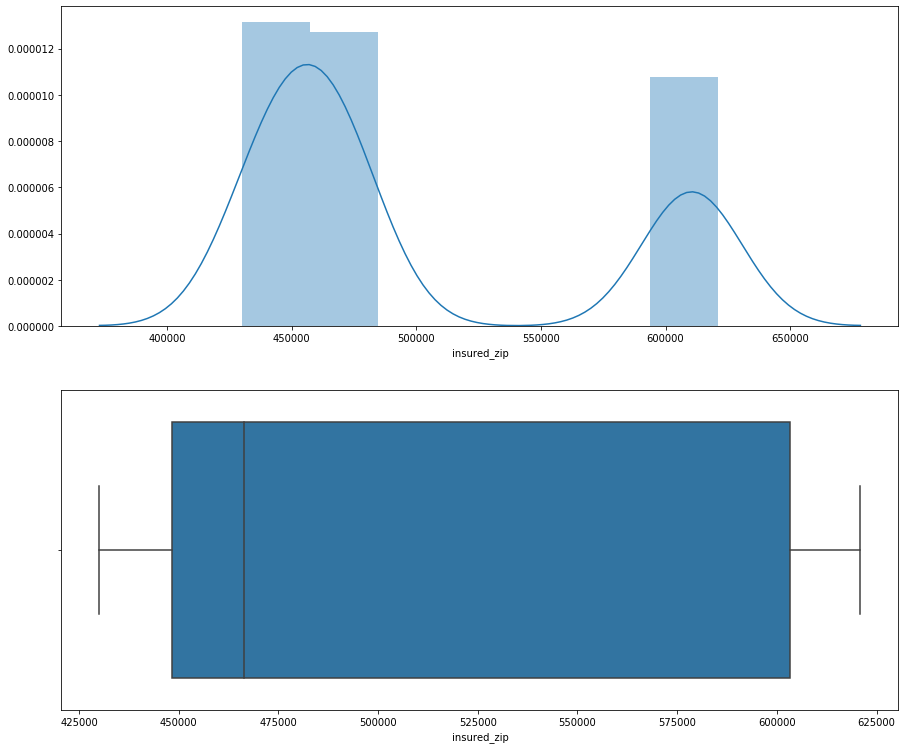

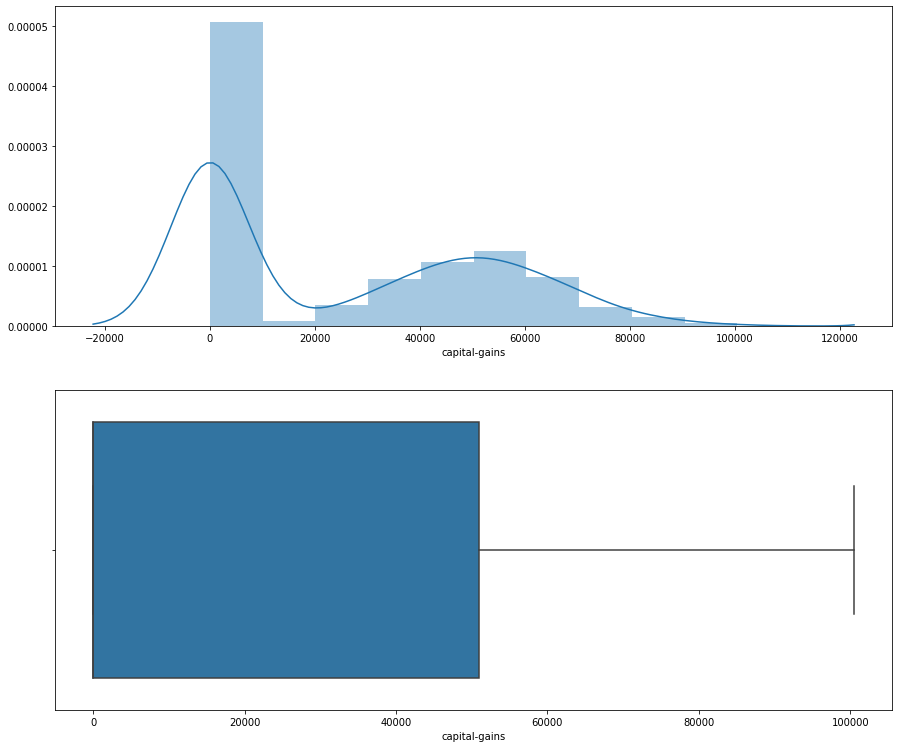

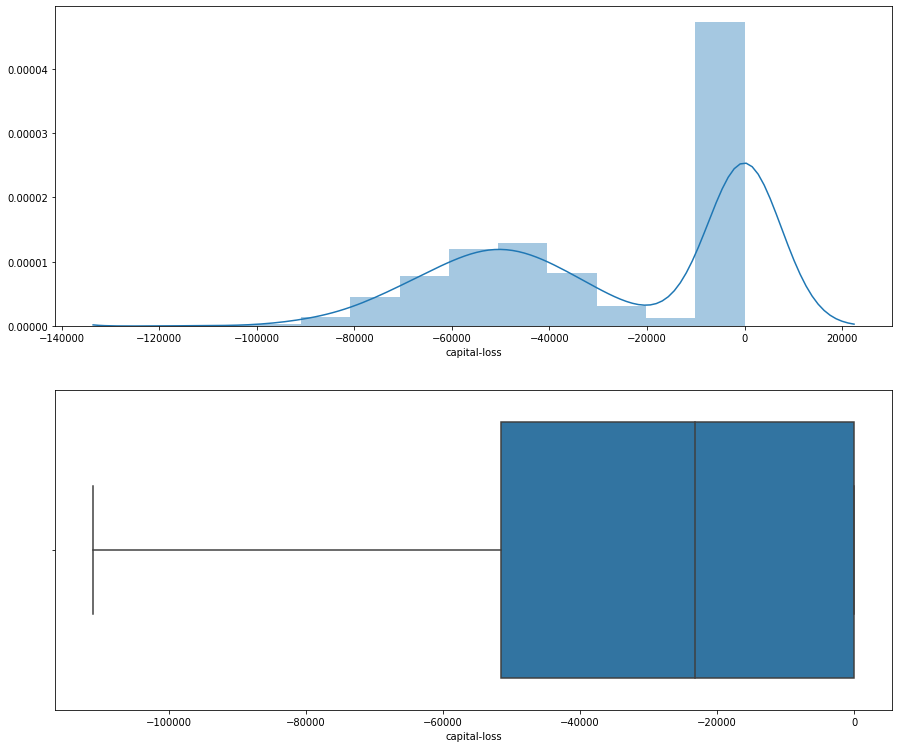

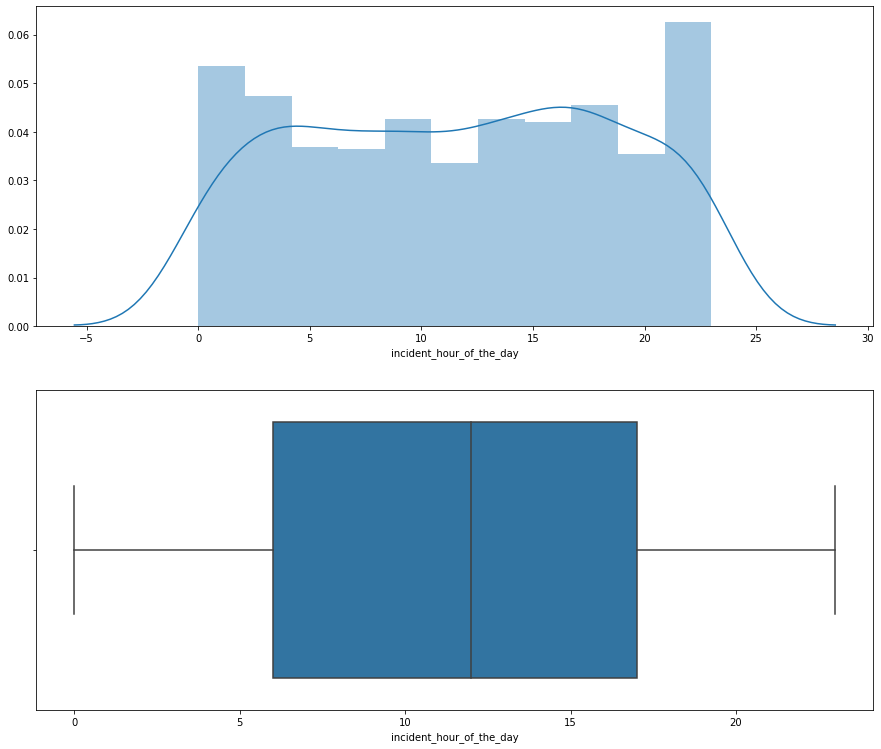

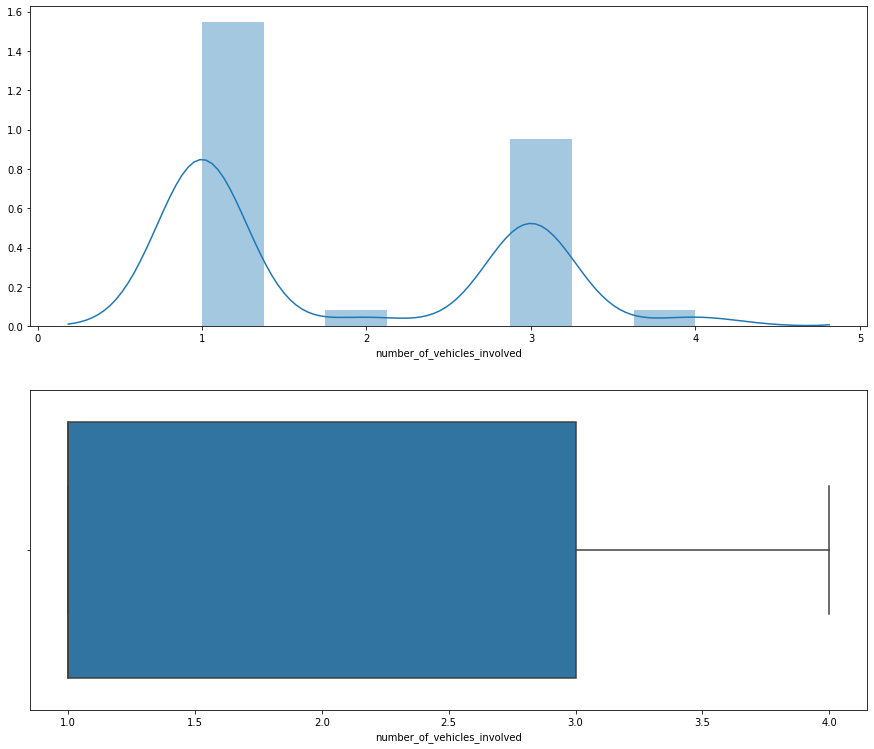

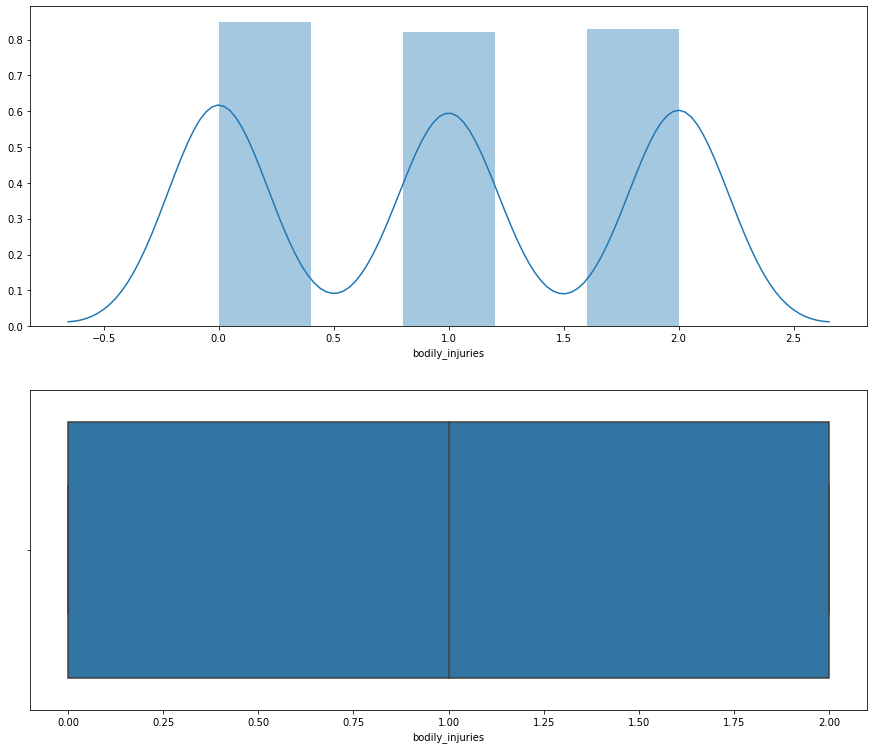

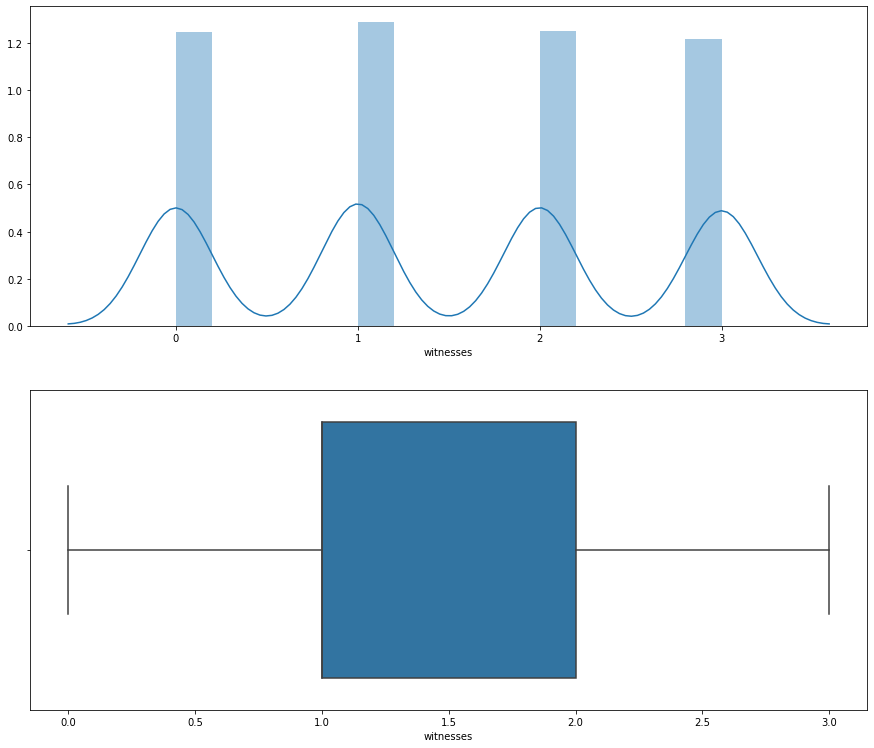

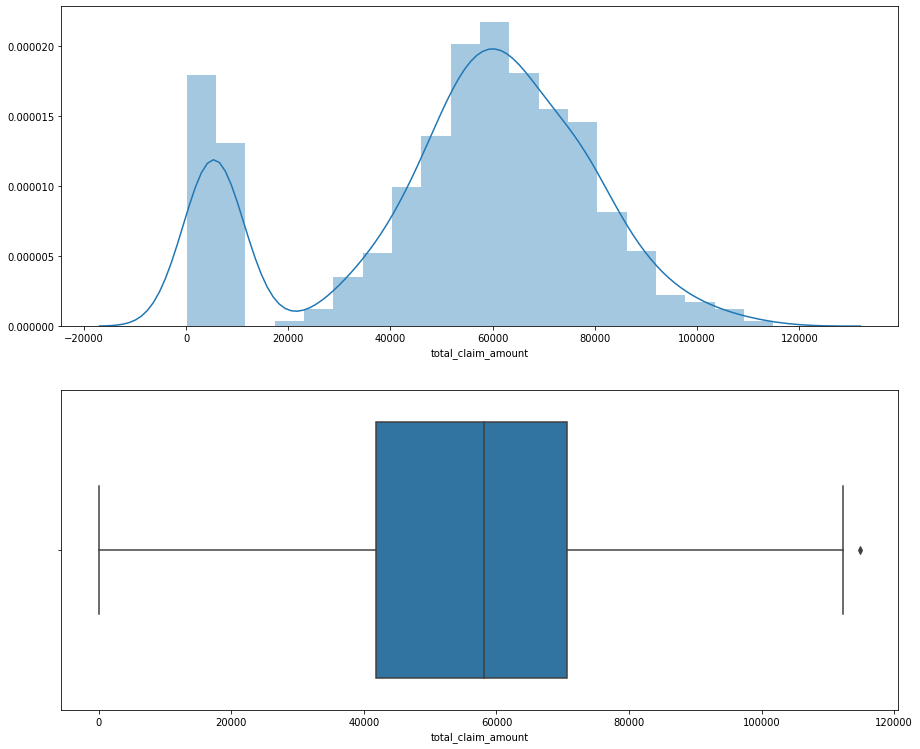

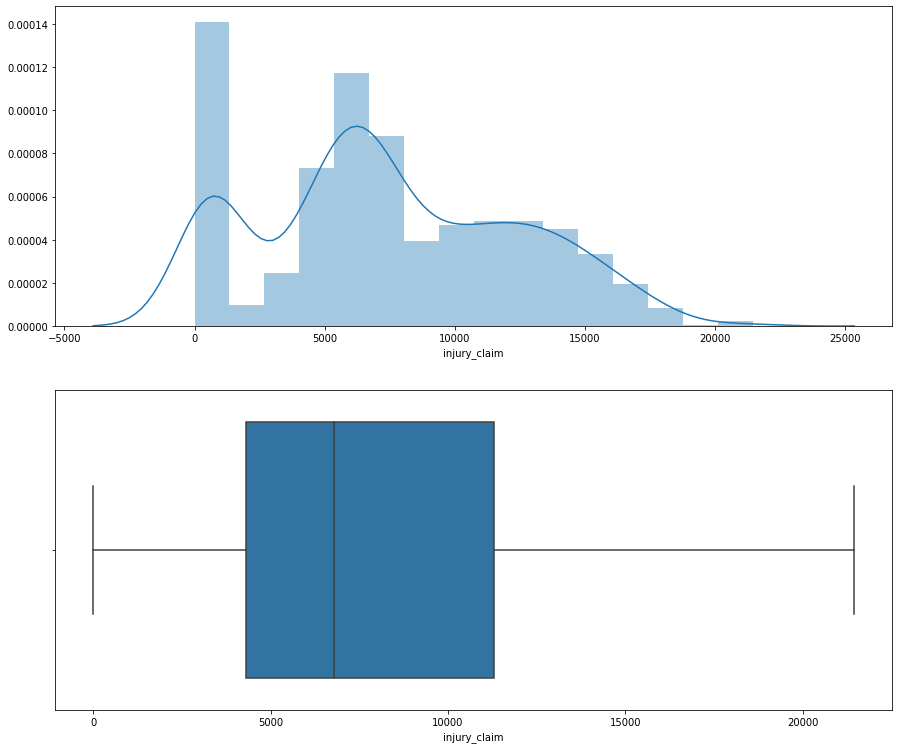

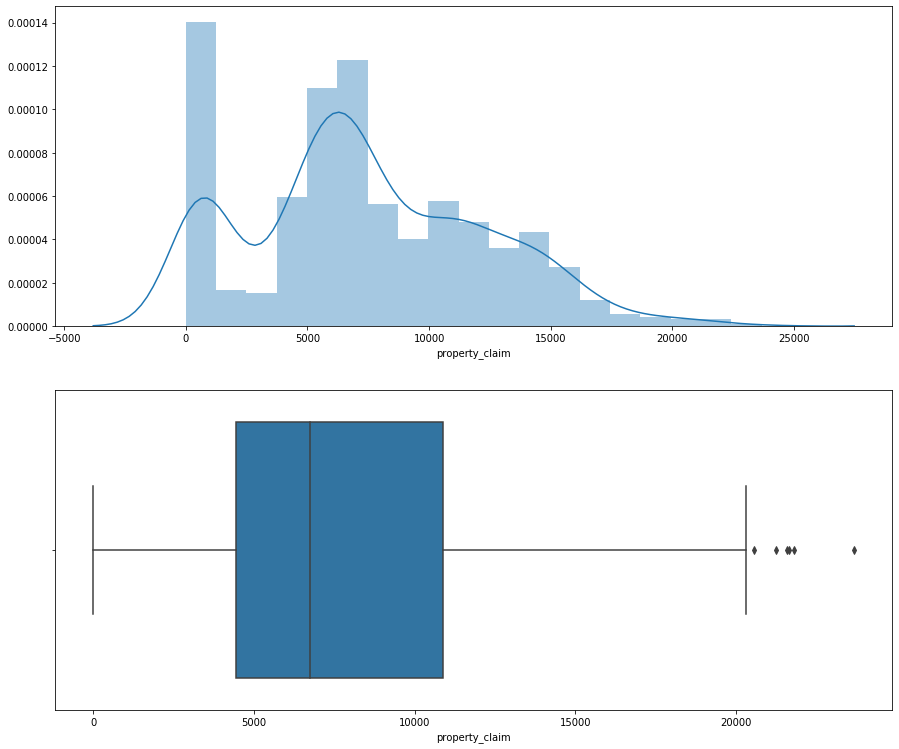

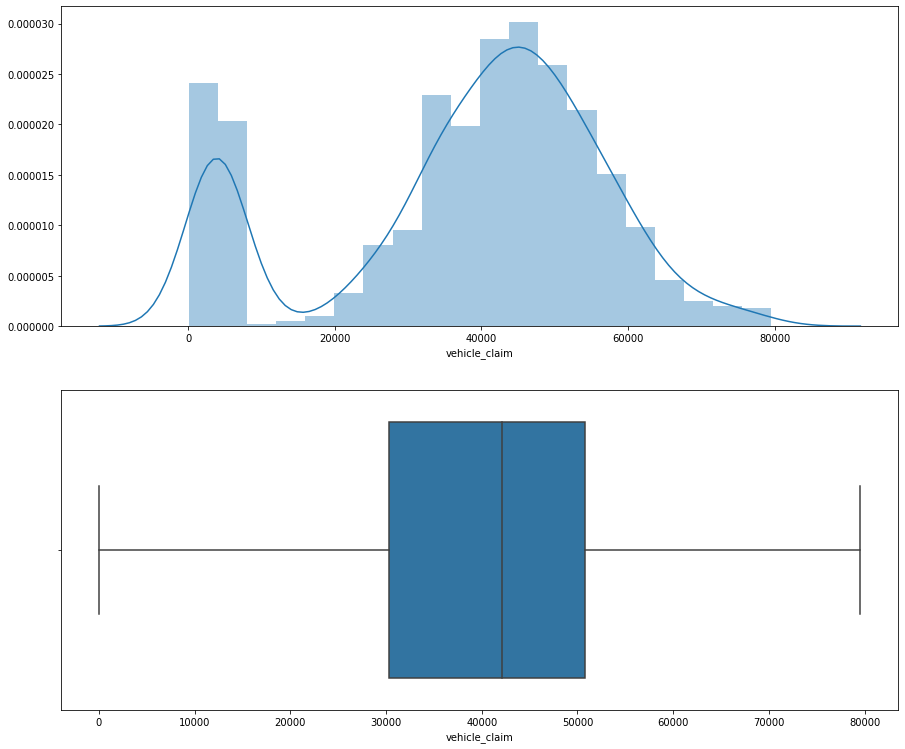

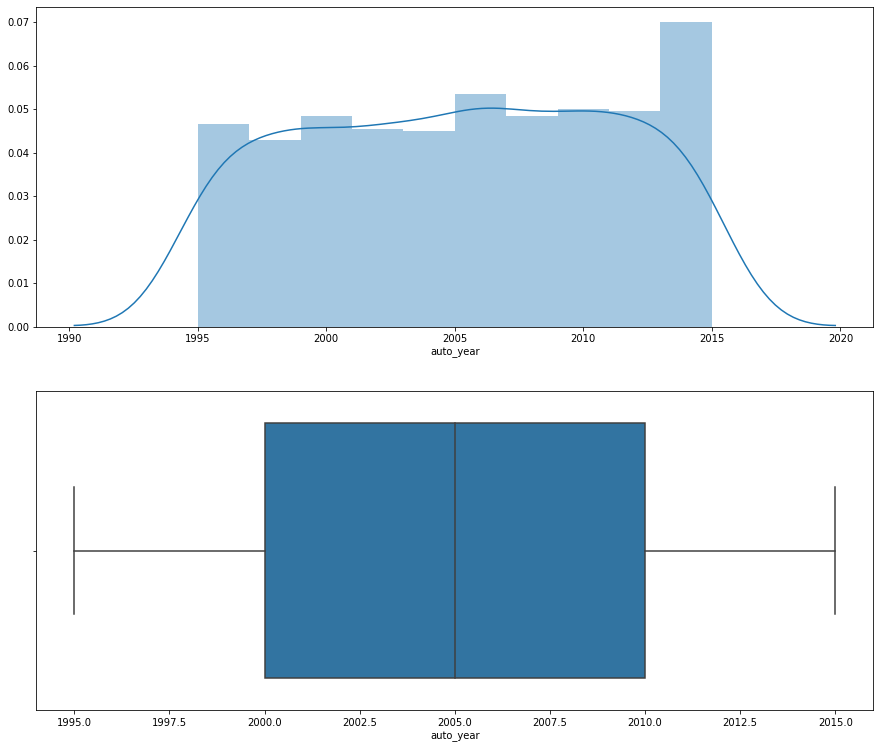

In [18]:
for i in df_int:
    plt.figure(figsize=(15,20))
    plt.subplot(311)
    sns.distplot(df_int[i])
    plt.subplot(312)
    sns.boxplot(df_int[i])

In [19]:
df_object=df.select_dtypes(include=[np.object])

In [20]:
df_object.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [21]:
for i in df_object:
    print(i)
    print(df_object[i].nunique())

policy_bind_date
951
policy_state
3
policy_csl
3
insured_sex
2
insured_education_level
7
insured_occupation
14
insured_hobbies
20
insured_relationship
6
incident_date
60
incident_type
4
collision_type
4
incident_severity
4
authorities_contacted
5
incident_state
7
incident_city
7
incident_location
1000
property_damage
3
police_report_available
3
auto_make
14
auto_model
39
fraud_reported
2


In [22]:
#Policy bind date
df_object['policy_bind_day']=df_object['policy_bind_date'].str.split('-').str[0].astype(int)
df_object['policy_bind_month']=df_object['policy_bind_date'].str.split('-').str[1].astype(int)
df_object['policy_bind_year']=df_object['policy_bind_date'].str.split('-').str[2].astype(int)

In [23]:
df_object.drop(['policy_bind_date'],axis=1,inplace=True)

In [24]:
#Policy state
df_object['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_object['policy_state']=le.fit_transform(df_object['policy_state'])

In [26]:
#policy_csl Column
df_object['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [27]:
df_object['policy_csl']=le.fit_transform(df_object['policy_csl'])

In [28]:
#insured_sex Column
df_object['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [29]:
df_object['insured_sex']=le.fit_transform(df_object['insured_sex'])

In [30]:
#insured_education_level Column
df_object['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [31]:
df_object['insured_education_level']=le.fit_transform(df_object['insured_education_level'])

In [32]:
#insured_occupation Column
df_object['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [33]:
df_object['insured_occupation']=le.fit_transform(df_object['insured_occupation'])

In [34]:
#insured_hobbies Column
df_object['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [35]:
df_object['insured_hobbies']=le.fit_transform(df_object['insured_hobbies'])

In [36]:
#insured_relationship Column
df_object['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [37]:
df_object['insured_relationship']=le.fit_transform(df_object['insured_relationship'])

In [38]:
#incident_date Column
df_object['incident_day']=df_object['incident_date'].str.split('-').str[0].astype(int)
df_object['incident_month']=df_object['incident_date'].str.split('-').str[1].astype(int)
df_object['incident_year']=df_object['incident_date'].str.split('-').str[2].astype(int)

In [39]:
df_object.drop(['incident_date'],axis=1,inplace=True)

In [40]:
#incident_type Column
df_object['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [41]:
df_object['incident_type']=le.fit_transform(df_object['incident_type'])

In [42]:
#collision_type Column
df_object['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [43]:
df_object['collision_type'].replace(['?'],['None'],inplace=True)

In [44]:
df_object['collision_type']=le.fit_transform(df_object['collision_type'])

In [45]:
#incident_severity Column
df_object['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [46]:
df_object['incident_severity']=le.fit_transform(df_object['incident_severity'])

In [47]:
#authorities_contacted Column
df_object['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [48]:
df_object['authorities_contacted']=le.fit_transform(df_object['authorities_contacted'])

In [49]:
#incident_state , incident_city , incident_location Column

In [50]:
df_object['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [51]:
df_object['incident_state']=le.fit_transform(df_object['incident_state'])

In [52]:
df_object['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [53]:
df_object['incident_city']=le.fit_transform(df_object['incident_city'])

In [54]:
df_object['incident_location'].value_counts()

6158 Sky Ridge          1
1229 5th Ave            1
8821 Elm St             1
3805 Lincoln Hwy        1
2950 MLK Ave            1
6522 Apache Drive       1
8204 Pine Lane          1
1558 1st Ridge          1
7923 Elm Ave            1
1454 5th Ridge          1
9078 Francis Ridge      1
6110 Rock Ridge         1
7223 Embaracadero St    1
5904 1st Drive          1
5602 Britain St         1
1699 Oak Drive          1
6501 5th Drive          1
7928 Maple Ridge        1
3659 Oak Lane           1
8212 Flute Ridge        1
6058 Andromedia Hwy     1
8203 Lincoln Ave        1
5333 MLK Lane           1
3797 Solo Lane          1
2980 Sky Ridge          1
3263 Pine Ridge         1
9325 Lincoln Drive      1
2903 Weaver Drive       1
7511 1st Ave            1
3814 Britain Drive      1
                       ..
9879 Apache Drive       1
2889 Weaver St          1
9728 Britain Hwy        1
9397 Francis St         1
3842 Solo Ridge         1
3066 Francis Ave        1
4545 4th Ridge          1
8983 Francis

In [55]:
df_object.drop(['incident_location'],axis=1,inplace=True)

In [56]:
#property_damage , police_report_available Column
df_object['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [57]:
df_object['property_damage'].replace(['?'],['None'],inplace=True)

In [58]:
df_object['property_damage']=le.fit_transform(df_object['property_damage'])

In [59]:
df_object['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [60]:
df_object['police_report_available'].replace(['?'],['None'],inplace=True)

In [61]:
df_object['police_report_available']=le.fit_transform(df_object['police_report_available'])

In [62]:
#auto_make , auto_model Column
df_object['auto_make'].value_counts()

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [63]:
df_object['auto_make']=le.fit_transform(df_object['auto_make'])

In [64]:
df_object['auto_model'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
E400              27
95                27
F150              27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
Ultima            23
X5                23
Civic             22
Silverado         22
Highlander        22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [65]:
df_object['auto_model']=le.fit_transform(df_object['auto_model'])

In [66]:
#fraud_reported column->target varibale
df_object['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [67]:
df_object['fraud_reported']=le.fit_transform(df_object['fraud_reported'])


In [68]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
policy_state               1000 non-null int32
policy_csl                 1000 non-null int32
insured_sex                1000 non-null int32
insured_education_level    1000 non-null int32
insured_occupation         1000 non-null int32
insured_hobbies            1000 non-null int32
insured_relationship       1000 non-null int32
incident_type              1000 non-null int32
collision_type             1000 non-null int32
incident_severity          1000 non-null int32
authorities_contacted      1000 non-null int32
incident_state             1000 non-null int32
incident_city              1000 non-null int32
property_damage            1000 non-null int32
police_report_available    1000 non-null int32
auto_make                  1000 non-null int32
auto_model                 1000 non-null int32
fraud_reported             1000 non-null int32
policy_bind_day            1000 non-null int32
p

In [69]:
#Merging two dataframe using concat function
df_new=pd.concat([df_int,df_object],axis=1)
df_new.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,2,10,1,1,17,10,2014,25,1,2015
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,1,8,12,1,27,6,2006,21,1,2015
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,0,4,30,0,6,9,2000,22,2,2015
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,3,34,1,25,5,1990,10,1,2015
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,0,0,31,0,6,6,2014,17,2,2015


In [70]:
df_new.shape

(1000, 42)

In [71]:
df_new['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [72]:
from sklearn.utils import resample
df_0 = df_new[df_new['fraud_reported']==0]
df_1 = df_new[df_new['fraud_reported']==1]

df_1_ups = resample(df_1,replace=True,n_samples=753,random_state=123) 
 
df_new = pd.concat([df_0, df_1_ups])

In [73]:
df_new.shape

(1506, 42)

In [74]:
df_new['fraud_reported'].value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [75]:
#separating independent and dependent variables
df_x=df_new.drop(columns=['fraud_reported'])
y=df_new[['fraud_reported']]

In [76]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)

In [77]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=63,stratify=y)

In [78]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1129, 41) (377, 41)
(1129, 1) (377, 1)


In [79]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=5)
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [80]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.6816976127320955


Cross_Val_Score =  0.725219298245614


roc_auc_score =  0.6816531577169874


classification_report
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       189
           1       0.69      0.66      0.68       188

    accuracy                           0.68       377
   macro avg       0.68      0.68      0.68       377
weighted avg       0.68      0.68      0.68       377



[[132  57]
 [ 63 125]]


F1_score= 0.6756756756756757


Precision_score= 0.6868131868131868


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function

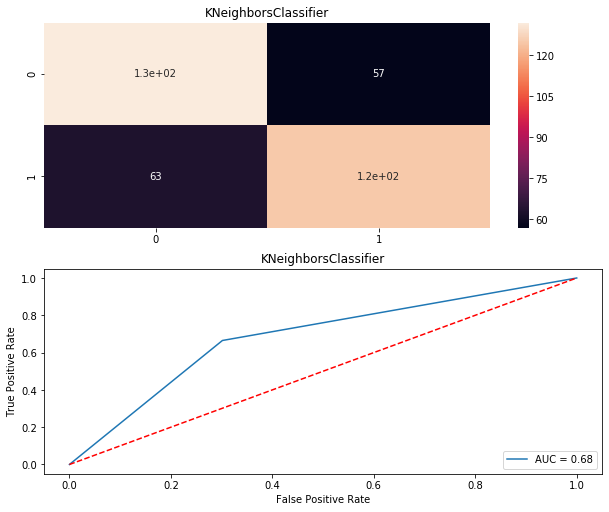

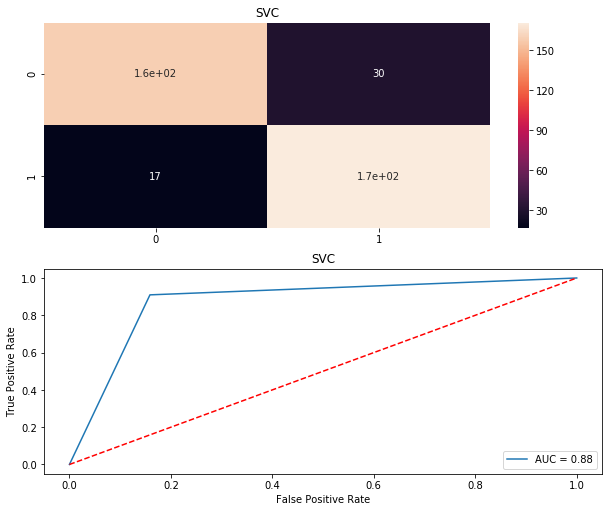

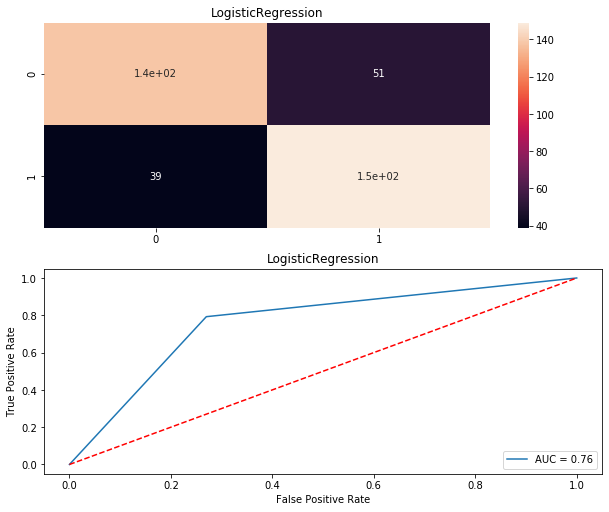

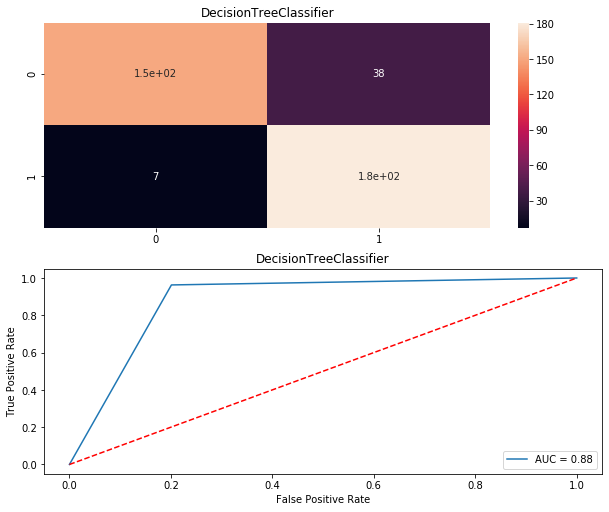

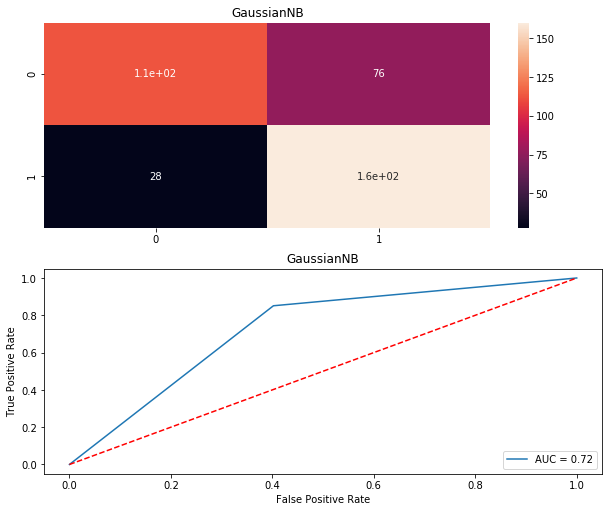

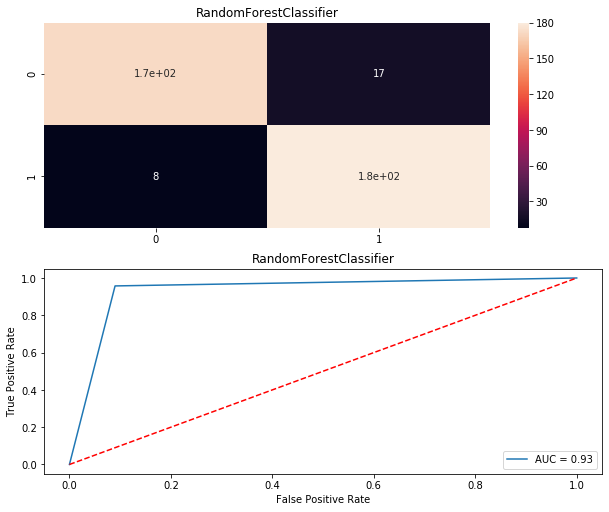

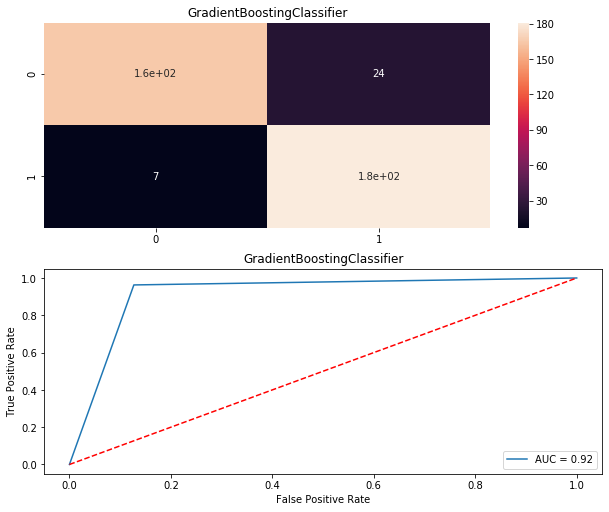

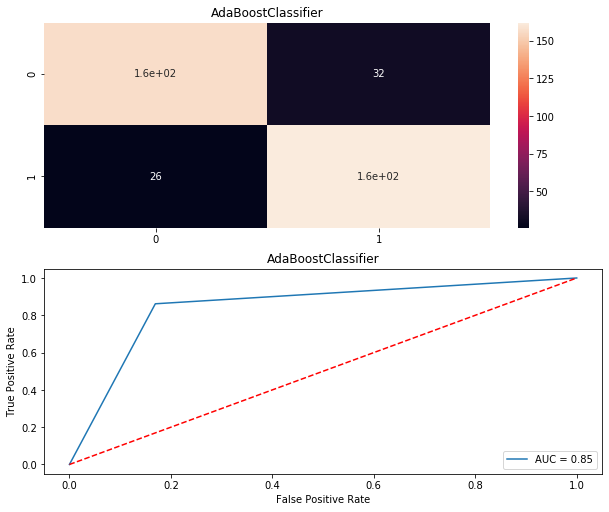

In [81]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [82]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,68.169761,72.521930,68.165316,0.848168,68.681319
1,SVC,87.533156,86.195614,87.542215,0.848168,85.074627
2,LogisticRegression,76.127321,72.318421,76.135596,0.848168,74.500000
3,DecisionTreeClassifier,88.063660,91.500877,88.085388,0.848168,82.648402
4,GaussianNB,72.413793,69.393860,72.447371,0.848168,67.796610
5,RandomForestClassifier,93.368700,92.302632,93.374986,0.848168,91.370558
6,GradientBoostingClassifier,91.777188,89.846491,91.789092,0.848168,88.292683
7,AdaBoostClassifier,84.615385,84.398246,84.619498,0.848168,83.505155


From the above table we can easily identify that our model is performing good in Random Forest Classifier Algorithm.
So, I choose Random Forest Classifier Algorithm because it has the highest accuracy score, precision score and good cross validation score.


In [83]:
#Lets use GridsearchCV for hyperparamenter tuning for Random Forest Classifier 
def maxacc_score(regr,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [84]:
pipeline=Pipeline([("ss",StandardScaler()),("RFC",RandomForestClassifier())])
parameters = {"RFC__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'RFC__n_estimators': 200}

In [85]:
pipeline_RFC=Pipeline([("ss",StandardScaler()),("RFC",RandomForestClassifier(n_estimators=500))])
maxacc_score(pipeline_RFC,x,y)

max accuracy score corresponding to  59  is  0.9363395225464191


59

After applying Hyperparameters we can observe accuracy score has been increased from 0.931 to 0.9496.                           
Hence RandomForestClassifier Algorithm is the best Algorithm for this problem.                                                 
Accuracy Score=93.103448                                                                                      				
Cross Validation Score=94.028947
ROC AUC Curve=93.104807
F1 Score=0.848168
Precision Score=92.631579

In [86]:
from sklearn.externals import joblib
joblib.dump(RFC,"Automobile_Insurance_Fraud_RFC.pkl")

['Automobile_Insurance_Fraud_RFC.pkl']